In [13]:
#!pip install scikeras

In [14]:
#!pip uninstall numpy


In [15]:
!pip install tensorflow

In [16]:
!pip install pandas

In [17]:
!pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 7.8/7.8 MB 48.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 42.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 49.0 MB/s eta 0:00:00


In [18]:
!pip install seaborn

In [19]:
#pip install --no-use-pep517 tensorflow


In [20]:
!pip install numpy

In [22]:
!pip install scikeras

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----------------------------- ---------- 8.1/11.0 MB 41.8 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 40.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------- ----------------------------- 11.5/44.8 MB 55.5 MB/s eta 0:00:01
   ------------------- -------------------- 22.0/44.8 MB 53.6 MB/s eta 0:00:01
   ------------------------------ --------- 33.8/44.8 MB 53.7 MB/s eta 0:00:01
   ---------------------------------------  44.6/44.8 MB 54.6 MB/s eta 0:00:01
   ---------------------------------------- 44.8/44.8 MB 49.1 MB/s eta 0:00:00


### Breast Cancer Classification

In this notebook, we'll apply knowledges of DL to classify if an tumor is either bening (0) or malign (1). Sure, we don't need DL to classify that type of data, since it's posible to use catboost/xboost and others models to archive an accurate prediction of structured data. However, it's interesting to apply as practice. Database can be found in the link on the side: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import scikeras
import sklearn
import os

In [47]:
import warnings
warnings.filterwarnings('ignore')


Importing database

In [25]:


path = r'C:\Users\caioe\OneDrive\Área de Trabalho\Breast_cancer'

file_name_var = 'entradas_breast.csv'
file_name_target = 'saidas_breast.csv'
file_path = os.path.join(path, file_name_var)
X = pd.read_csv(file_path)
X.head()

radius_mean   texture_mean   perimeter_mean   area_mean   smoothness_mean  \
0         17.99          10.38           122.80      1001.0           0.11840   
1         20.57          17.77           132.90      1326.0           0.08474   
2         19.69          21.25           130.00      1203.0           0.10960   
3         11.42          20.38            77.58       386.1           0.14250   
4         20.29          14.34           135.10      1297.0           0.10030   

    compactness_mean   concavity_mean  concave_points_mean   symmetry_mean  \
0            0.27760           0.3001              0.14710          0.2419   
1            0.07864           0.0869              0.07017          0.1812   
2            0.15990           0.1974              0.12790          0.2069   
3            0.28390           0.2414              0.10520          0.2597   
4            0.13280         198.0000              0.10430          0.1809   

    fractal_dimension_mean  ...   radius_worst   texture_worst  \
0                  0.07871  ...          25.38           17.33   
1                  0.05667  ...          24.99           23.41   
2                  0.05999  ...          23.57           25.53   
3                  0.09744  ...          14.91           26.50   
4                  0.05883  ...          22.54           16.67   

    perimeter_worst   area_worst   smoothness_worst   compactness_worst  \
0            184.60       2019.0             0.1622              0.6656   
1            158.80       1956.0             0.1238              0.1866   
2            152.50       1709.0             0.1444              0.4245   
3             98.87        567.7             0.2098              0.8663   
4            152.20       1575.0             0.1374            205.0000   

    concavity_worst   concave_points_worst   symmetry_worst  \
0            0.7119                 0.2654           0.4601   
1            0.2416               186.0000         275.0000   
2            0.4504               243.0000           0.3613   
3            0.6869                 0.2575           0.6638   
4            0.4000                 0.1625           0.2364   

    fractal_dimension_worst  
0                   0.11890  
1                   0.08902  
2                   0.08758  
3                 173.00000  
4                   0.07678  

[5 rows x 30 columns]

In [26]:
file_path = os.path.join(path, file_name_target)
y = pd.read_csv(file_path)
y.head()

0
0  0
1  0
2  0
3  0
4  0

Train-test

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (426, 30) (426, 1)
Test: (143, 30) (143, 1)


Structure of Neural Network

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
# First of all, we need to discover how many neurons are enought to an binary classification hidden layer. We have 30 features for 1 category. 30+1/2 = 15.5 -> 16 dense neurons



neural_network = Sequential([
    # entry date
    tf.keras.layers.InputLayer(shape = (30,)),

    # hidden layer
    tf.keras.layers.Dense(units = 16, activation = 'relu'),
    tf.keras.layers.Dense(units = 16, activation = 'relu'),

    # output layer
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])



In [30]:
neural_network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005)

In [32]:
neural_network.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [33]:
neural_network.fit(X_train, y_train, batch_size = 8, epochs = 200)

Epoch 1/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.5669 - loss: 36.7951
Epoch 2/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.5669 - loss: 5.6558
Epoch 3/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5967 - loss: 3.8523
Epoch 4/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7083 - loss: 1.6868
Epoch 5/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7578 - loss: 1.0849
Epoch 6/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7183 - loss: 1.3737
Epoch 7/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7677 - loss: 0.8470
Epoch 8/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8081 - loss: 0.5258
Epoch 9/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7798 - loss: 0.7218
Epoch 10/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6818 - loss: 2.3490
Epoch 11/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7937 


Probability of malign tumor

In [34]:
pred = neural_network.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [35]:
pred

array([[8.06384921e-01],
       [1.81539335e-07],
       [8.33916571e-03],
       [9.96173978e-01],
       [9.92154956e-01],
       [1.62620039e-11],
       [1.55077105e-05],
       [6.65374339e-01],
       [9.65324938e-01],
       [9.86839831e-01],
       [9.77813125e-01],
       [1.79530121e-02],
       [9.12310839e-01],
       [5.02484202e-01],
       [1.00000000e+00],
       [4.12548751e-01],
       [9.89829302e-01],
       [9.96173978e-01],
       [1.00000000e+00],
       [1.26320665e-04],
       [2.26078409e-05],
       [9.85989451e-01],
       [6.49971952e-08],
       [9.94315565e-01],
       [9.92154956e-01],
       [9.89792585e-01],
       [9.95177150e-01],
       [9.92154956e-01],
       [9.84908104e-01],
       [1.80812071e-06],
       [9.93786633e-01],
       [9.95966792e-01],
       [1.00000000e+00],
       [8.68022978e-01],
       [9.95740891e-01],
       [9.96173978e-01],
       [1.00208454e-01],
       [9.33996975e-01],
       [8.34118274e-10],
       [7.90661037e-01],


Well, we can determine if probability is above 50%, it has a high probability of malign tumor.

In [36]:
pred = pred > 0.5

In [37]:
pred

array([[ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
accuracy_score(y_test, pred)

0.9230769230769231

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

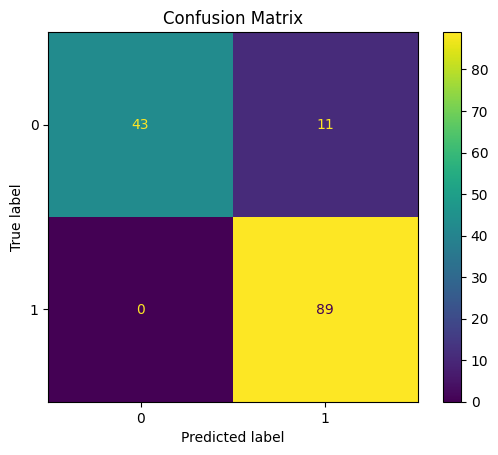

In [41]:
cm = confusion_matrix(y_test, pred)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.viridis)  #
plt.title('Confusion Matrix')
plt.show()

Accuracy and loss for the general test

In [42]:
neural_network.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9257 - loss: 0.1868 


[0.20930340886116028, 0.9230769276618958]

So, let's try crossvalidation for now:

In [43]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from scikeras.wrappers import KerasClassifier
import keras.backend as k


In [44]:
def generate_network():
    k.clear_session()
    neural_network = Sequential([
    # entry date
    tf.keras.layers.InputLayer(shape = (30,)),

    # hidden layer
    tf.keras.layers.Dense(units = 16, activation = 'relu'),
    tf.keras.layers.Dense(units = 16, activation = 'relu'),

    # output layer
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
  ])
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005)
    neural_network.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
    return neural_network


In [45]:
neural_network = KerasClassifier(model = generate_network, epochs = 200, batch_size = 8, verbose = 0)

In [46]:
results = cross_val_score(estimator = neural_network, X = X, y = y, cv = 10, scoring = 'accuracy')

In [48]:
results

array([0.87719298, 0.78947368, 0.87719298, 0.96491228, 0.92982456,
       0.9122807 , 0.89473684, 0.92982456, 0.92982456, 0.92857143])

Accuracy is a mean of array's results

In [49]:
results.mean()

0.9033834586466165

In [50]:
results.std()

0.04584634034272351

Well, in those circunstances, it hasn't improved at all. Let's check when we use CV Grid

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
def generate_network( neurons):
    k.clear_session()
    neural_network = Sequential([
    # entry date
    tf.keras.layers.InputLayer(shape = (30,)),

    # hidden layer
    tf.keras.layers.Dense(units = neurons, activation = 'relu', kernel_initializer = 'random_normal'),

    tf.keras.layers.Dense(units = neurons, activation = 'relu', kernel_initializer = 'random_normal'),


    # output layer
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
  ])
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005)
    neural_network.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
    return neural_network

In [53]:
neural_network = KerasClassifier(model=generate_network)

In [58]:
parameters = {
    'batch_size': [8, 16, 32],
    'epochs': [50,100,200],

    'model__neurons': [8, 16, 32, 64]
}

In [59]:
grid_search = GridSearchCV(estimator=neural_network, param_grid=parameters, scoring='accuracy', cv=10)

In [60]:
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.5264 - loss: 1.6335  
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.5274 - loss: 0.6219
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - binary_accuracy: 0.6293 - loss: 0.6074
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - binary_accuracy: 0.5915 - loss: 0.6336
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - binary_accuracy: 0.6519 - loss: 0.6046
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - binary_accuracy: 0.6077 - loss: 0.6300
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6402 - loss: 0.6015
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6306 - loss: 0.6004
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6182 - loss: 0.6150
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - binary_accuracy: 0.6056 - loss: 0.6219
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6418 

In [61]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'batch_size': 8, 'epochs': 100, 'model__neurons': 32}


Of course, we could have tried many features for best parameters searcher, but for a simples binary classification, features above are enought. So, let's experience with those parameters.

In [72]:
neurons = 32

In [73]:

neural_network = KerasClassifier(build_fn=generate_network, neurons=neurons, epochs=100, batch_size=8, verbose=0)


results = cross_val_score(estimator=neural_network, X=X, y=y, cv=10, scoring='accuracy')

In [74]:
results.mean()

0.9068922305764412

In [75]:
results.std()

0.03505212121883194

In fact, it has improved a little bit. So, let's try to classify a single element

In [76]:
neural_network.fit(X, y, batch_size = 8, epochs = 100)

KerasClassifier(
	model=None
	build_fn=<function generate_network at 0x0000019A17F9DA20>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=8
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
	neurons=32
	class_weight=None
)

In [77]:
X

radius_mean   texture_mean   perimeter_mean   area_mean  \
0           17.99          10.38           122.80      1001.0   
1           20.57          17.77           132.90      1326.0   
2           19.69          21.25           130.00      1203.0   
3           11.42          20.38            77.58       386.1   
4           20.29          14.34           135.10      1297.0   
..            ...            ...              ...         ...   
564         21.56          22.39           142.00      1479.0   
565         20.13          28.25           131.20      1261.0   
566         16.60          28.08           108.30       858.1   
567         20.60          29.33           140.10      1265.0   
568          7.76          24.54            47.92       181.0   

      smoothness_mean   compactness_mean   concavity_mean  \
0             0.11840            0.27760          0.30010   
1             0.08474            0.07864          0.08690   
2             0.10960            0.15990          0.19740   
3             0.14250            0.28390          0.24140   
4             0.10030            0.13280        198.00000   
..                ...                ...              ...   
564         111.00000            0.11590          0.24390   
565           0.09780            0.10340        144.00000   
566           0.08455            0.10230          0.09251   
567           0.11780          277.00000          0.35140   
568           0.05263            0.04362          0.00000   

     concave_points_mean   symmetry_mean   fractal_dimension_mean  ...  \
0                0.14710          0.2419                  0.07871  ...   
1                0.07017          0.1812                  0.05667  ...   
2                0.12790          0.2069                  0.05999  ...   
3                0.10520          0.2597                  0.09744  ...   
4                0.10430          0.1809                  0.05883  ...   
..                   ...             ...                      ...  ...   
564              0.13890          0.1726                  0.05623  ...   
565              0.09791          0.1752                  0.05533  ...   
566              0.05302        159.0000                  0.05648  ...   
567            152.00000          0.2397                  0.07016  ...   
568              0.00000          0.1587                  0.05884  ...   

      radius_worst   texture_worst   perimeter_worst   area_worst  \
0            25.38           17.33            184.60       2019.0   
1            24.99           23.41            158.80       1956.0   
2            23.57           25.53            152.50       1709.0   
3            14.91           26.50             98.87        567.7   
4            22.54           16.67            152.20       1575.0   
..             ...             ...               ...          ...   
564          25.45           26.40            166.10       2027.0   
565          23.69           38.25            155.00       1731.0   
566          18.98           34.12            126.70       1124.0   
567          25.74           39.42            184.60       1821.0   
568        9456.00           30.37             59.16        268.6   

      smoothness_worst   compactness_worst   concavity_worst  \
0              0.16220             0.66560            0.7119   
1              0.12380             0.18660            0.2416   
2              0.14440             0.42450            0.4504   
3              0.20980             0.86630            0.6869   
4              0.13740           205.00000            0.4000   
..                 ...                 ...               ...   
564          141.00000             0.21130            0.4107   
565            0.11660             0.19220            0.3215   
566            0.11390             0.30940            0.3403   
567          165.00000             0.86810            0.9387   
568            0.08996             0.06444            0.0000   

     

In [101]:
new_value = np.array([[np.random.choice(X[column]) for column in X.columns]])

In [102]:
print(new_value)

[[2.047e+01 1.902e+01 1.102e+02 1.234e+03 9.250e-02 9.752e-02 1.554e-01
  9.052e-02 1.641e-01 7.782e-02 2.084e-01 2.265e+03 1.445e+03 1.854e+01
  5.251e-03 2.493e-02 3.872e-02 1.247e-02 3.218e-02 8.015e-03 8.678e+03
  2.457e+01 9.669e+01 1.780e+03 1.297e-01 2.097e-01 1.783e-01 6.754e-02
  3.198e-01 6.818e-02]]


In [103]:
new_value.shape

(1, 30)

In [104]:
pred = neural_network.predict(new_value)

In [105]:
pred

array([[1]], dtype=int64)

In [106]:
pred = pred >0.5
print(pred)

[[ True]]


In [107]:
if pred:
    print('Malign')
else:
    print('Bening')    

Malign
